#### Data Understanding

In [455]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Setting option to display more rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#Import the csv file to dataframe
loan_data_raw_df = pd.read_csv('loan.csv')
loan_data_raw_df.shape

(39717, 111)

In [456]:
loan_data_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [457]:
#Print the column with a number of null values. 
#Columns which dont have null values won’t be printed. 
#Output will be percentage of null values of the respective columns.
#After running the code we can see that there no of columns where 
#all the rows are filled with null value. We can drop these 
#columns during data frame cleaning exercise.
null_cols = loan_data_raw_df.columns[loan_data_raw_df.isnull().any()]
null_count = loan_data_raw_df[null_cols].isnull().sum()
null_percentage = loan_data_raw_df[null_cols].isnull().mean()*100
null_loan_data_raw_df = null_count.to_frame(name='Null Count')\
          .merge(null_percentage.to_frame(name='Null Percent'), left_index=True, right_index=True)
null_loan_data_raw_df_sorted = null_loan_data_raw_df.sort_values(by='Null Count', ascending=False)
print(null_loan_data_raw_df_sorted)
print(null_loan_data_raw_df_sorted.shape)

                                Null Count  Null Percent
bc_open_to_buy                       39717    100.000000
acc_open_past_24mths                 39717    100.000000
bc_util                              39717    100.000000
mo_sin_old_il_acct                   39717    100.000000
mo_sin_old_rev_tl_op                 39717    100.000000
mo_sin_rcnt_rev_tl_op                39717    100.000000
mo_sin_rcnt_tl                       39717    100.000000
mort_acc                             39717    100.000000
mths_since_recent_bc                 39717    100.000000
mths_since_recent_bc_dlq             39717    100.000000
mths_since_recent_inq                39717    100.000000
mths_since_recent_revol_delinq       39717    100.000000
num_accts_ever_120_pd                39717    100.000000
num_actv_bc_tl                       39717    100.000000
num_actv_rev_tl                      39717    100.000000
num_bc_sats                          39717    100.000000
num_bc_tl                      

In [458]:
#Check for duplicate values
loan_data_raw_df[loan_data_raw_df.duplicated()].shape[0]

0

#### Data cleaning

In [459]:
# Drop the columns where null percent is greater than 60%
null_columns_to_drop = null_percentage[null_percentage > 50].index

#New dataframe after dropping the columns
loan_data_without_null_df = loan_data_raw_df.drop(columns=null_columns_to_drop)
loan_data_without_null_df.head()
loan_data_without_null_df.shape

(39717, 54)

In [460]:
#Print the column with a number of zero values. 
#Columns which dont have zero values won’t be printed. 
#Output will be percentage of zero values of the respective columns.
#After running the code we can see that there no of columns where 
#all the rows are filled with zero value. We can drop these 
#columns during data frame cleaning exercise.

# Created a genric function incase we have to call mutiple times to check count wrt to a value
def calculate_value_count(src_df,val):
    val_cols = src_df.columns[(src_df == 0).any()]
    val_count = (src_df[val_cols] == 0).sum()
    val_percentage =  (src_df[val_cols] == 0).mean()*100

    val_df = val_count.to_frame(name='{val} Count')\
          .merge(val_percentage.to_frame(name='{val} Percent'), left_index=True, right_index=True)
    val_df_sorted = val_df.sort_values(by='{val} Count', ascending=False)

    return val_df_sorted,val_cols,val_count,val_percentage

zero_loan_data_raw_df_sorted,zero_cols,zero_count,zero_percentage = calculate_value_count(loan_data_without_null_df,0)

print(zero_loan_data_raw_df_sorted)
print(zero_loan_data_raw_df_sorted.shape)

                            {val} Count  {val} Percent
acc_now_delinq                    39717     100.000000
delinq_amnt                       39717     100.000000
tax_liens                         39678      99.901805
chargeoff_within_12_mths          39661      99.859002
collections_12_mths_ex_med        39661      99.859002
out_prncp                         38577      97.129693
out_prncp_inv                     38577      97.129693
total_rec_late_fee                37671      94.848554
pub_rec                           37601      94.672307
pub_rec_bankruptcies              37339      94.012639
collection_recovery_fee           35935      90.477629
recoveries                        35499      89.379863
delinq_2yrs                       35405      89.143188
inq_last_6mths                    19300      48.593801
revol_bal                           994       2.502707
dti                                 183       0.460760
total_pymnt_inv                     165       0.415439
funded_amn

In [461]:
# Drop the columns where zero percent is greater than 80%
zero_columns_to_drop = zero_percentage[zero_percentage > 80].index

#New dataframe after dropping the columns
loan_data_without_zero_df = loan_data_without_null_df.drop(columns=zero_columns_to_drop)
loan_data_without_zero_df.shape

(39717, 41)

In [462]:
# Drop further columns which are not important to the analysis and not 
# contributing to loan defaulting
# Considering the funded amount as its the actual amount given to customer,
#hence discarding loan_amount
cols_to_drop = ['id','member_id','pymnt_plan','url','title','zip_code',
                'initial_list_status','policy_code','last_pymnt_d','last_pymnt_amnt',
                'last_credit_pull_d','application_type','total_pymnt_inv',
                'total_rec_prncp','total_rec_int','earliest_cr_line','funded_amnt_inv',
                 'loan_amnt','desc','inq_last_6mths','revol_bal','revol_util',
                'emp_title','dti','open_acc']
loan_data_cleaned_df = loan_data_without_zero_df.drop(columns=cols_to_drop)

In [463]:
#Changing column name 
loan_data_cleaned_df.rename(columns={'funded_amnt': 'loan_amount'}, inplace=True)
loan_data_cleaned_df.rename(columns={'emp_length': 'tenure'}, inplace=True)
loan_data_cleaned_df.rename(columns={'int_rate': 'int_rate_percentage'}, inplace=True)
loan_data_cleaned_df.rename(columns={'addr_state': 'state'}, inplace=True)
loan_data_cleaned_df.rename(columns={'total_pymnt': 'total_payment'}, inplace=True)
loan_data_cleaned_df.rename(columns={'term': 'loan_period'}, inplace=True)
loan_data_cleaned_df.rename(columns={'annual_inc': 'annual_income'}, inplace=True)
loan_data_cleaned_df.rename(columns={'total_acc': 'total_account'}, inplace=True)
loan_data_cleaned_df.head()

,loan_amount,loan_period,int_rate_percentage,installment,grade,sub_grade,tenure,home_ownership,annual_income,verification_status,issue_d,loan_status,purpose,state,total_account,total_payment
0,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,9,5863.155187
1,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,4,1008.710000
2,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,10,3005.666844
3,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,37,12231.890000
4,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,38,3513.330000


In [464]:
# We will also drop all the rows where the column loan_status has "Current" value.
# This we are doing becuase it its ongoing thing and we cannot get insights for out target data ie identifying loan defauters
loan_data_cleaned_df.drop(loan_data_cleaned_df[loan_data_cleaned_df['loan_status'] == 'Current'].index, inplace=True)

In [465]:

# Checking for missing values
#Check the null value in the resulted clean df
# We see that the tenure has missing values 
null_column = loan_data_cleaned_df.columns[loan_data_cleaned_df.isnull().any()]
null_cnt = loan_data_cleaned_df[null_column].isnull().sum()
null_percent = loan_data_cleaned_df[null_column].isnull().mean()*100
null_loan_data_cleaned_df = null_cnt.to_frame(name='Null Count')\
          .merge(null_percent.to_frame(name='Null Percent'), left_index=True, right_index=True)
null_loan_data_cleaned_df_sorted = null_loan_data_cleaned_df.sort_values(by='Null Count', ascending=False)
print(null_loan_data_cleaned_df_sorted)
print(null_loan_data_cleaned_df_sorted.shape)

        Null Count  Null Percent
tenure        1033      2.677761
(1, 2)


In [466]:
# Let see how we can arrive at the value replacing the missing values
loan_data_cleaned_df.tenure.value_counts()

tenure
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [467]:
# We can see that the frequency of 10+ years is almost double that next most frequent values
# We will fill all the null values with mode value ie value of 10+ years in tnure column
loan_data_cleaned_df.tenure.fillna(loan_data_cleaned_df.tenure.mode()[0], inplace = True)

# Checking the missing values and we found there is no missing value
loan_data_cleaned_df.tenure.isna().sum()

0

#### Data Standardization

In [468]:
loan_data_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amount          38577 non-null  int64  
 1   loan_period          38577 non-null  object 
 2   int_rate_percentage  38577 non-null  object 
 3   installment          38577 non-null  float64
 4   grade                38577 non-null  object 
 5   sub_grade            38577 non-null  object 
 6   tenure               38577 non-null  object 
 7   home_ownership       38577 non-null  object 
 8   annual_income        38577 non-null  float64
 9   verification_status  38577 non-null  object 
 10  issue_d              38577 non-null  object 
 11  loan_status          38577 non-null  object 
 12  purpose              38577 non-null  object 
 13  state                38577 non-null  object 
 14  total_account        38577 non-null  int64  
 15  total_payment        38577 non-null  floa

In [469]:
# We will change the tenure,loan period,int_rate_percentage value type as numeric 
# Addtionally, 
# Removal of months string from values in loan_period cols
# Replace the years/year/+ in tenure with blank
# Make year < 1 as 0
# Make the null values as ?? This will see after doing the standarization
# Make the tenure 10+ as 10
loan_data_cleaned_df['loan_period'] = loan_data_cleaned_df['loan_period'].str.replace(' months', '')
loan_data_cleaned_df['loan_period'] = loan_data_cleaned_df['loan_period'].astype(int)

loan_data_cleaned_df['tenure'] = loan_data_cleaned_df['tenure'].str.replace('years', '')
loan_data_cleaned_df['tenure'] = loan_data_cleaned_df['tenure'].str.replace('year', '')
loan_data_cleaned_df['tenure'] = loan_data_cleaned_df['tenure'].str.replace('+', '')   
loan_data_cleaned_df['tenure'] = loan_data_cleaned_df['tenure'].str.replace('< 1', '0') 
loan_data_cleaned_df['tenure'] = loan_data_cleaned_df['tenure'].astype(int)

loan_data_cleaned_df['int_rate_percentage'] = loan_data_cleaned_df['int_rate_percentage'].str.replace('%', '')
loan_data_cleaned_df['int_rate_percentage'] = loan_data_cleaned_df['int_rate_percentage'].astype(float)

#Rounding off 
loan_data_cleaned_df['total_payment'] = loan_data_cleaned_df['total_payment'].round(2)
loan_data_cleaned_df['annual_income'] = loan_data_cleaned_df['annual_income'].round(2)
loan_data_cleaned_df.head()

,loan_amount,loan_period,int_rate_percentage,installment,grade,sub_grade,tenure,home_ownership,annual_income,verification_status,issue_d,loan_status,purpose,state,total_account,total_payment
0,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,9,5863.16
1,2500,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,4,1008.71
2,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,10,3005.67
3,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,37,12231.89
5,5000,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,12,5632.21


#### Outlier identifation and treatment
Following numerical columns we will check the outliers  
  annual income  
  loan amount

<B> annual_income </B>

<Axes: ylabel='annual_income'>

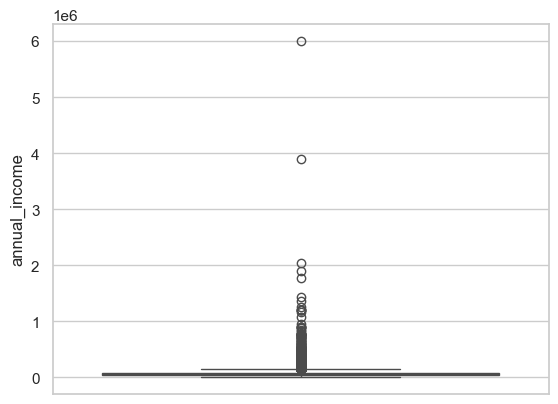

In [470]:
sns.boxplot(loan_data_cleaned_df.annual_income)

 
Outliers are present  
Check the quantile info  
Data at 95% and above seems huge within small steps/quantile  
Outlier threshold is 0.95  

In [471]:
quantile_info = loan_data_cleaned_df.annual_income.quantile([0.5, 0.75,0.85,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     58868.0
0.75     82000.0
0.85    100000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_income, dtype: float64

<Axes: ylabel='annual_income'>

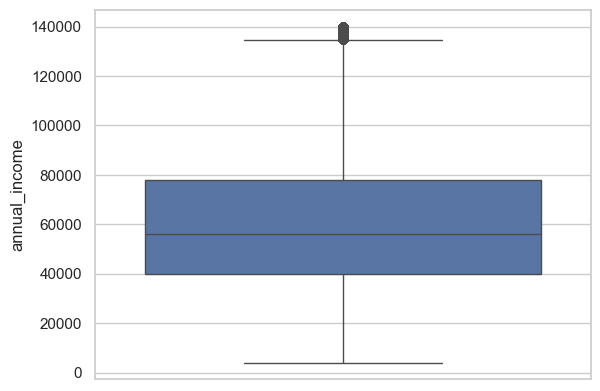

In [472]:
annual_income_95 = loan_data_cleaned_df['annual_income'].quantile(0.95)
loan_data_cleaned_df = loan_data_cleaned_df[loan_data_cleaned_df.annual_income <= annual_income_95]
sns.boxplot(loan_data_cleaned_df.annual_income)

Now the annual_income columsn values looks fine

<B>  loan_amount   </B>

<Axes: ylabel='loan_amount'>

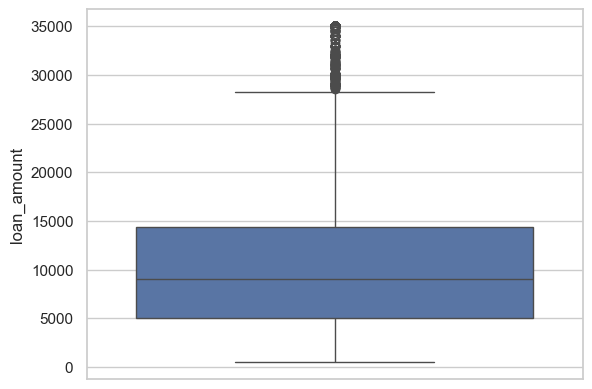

In [473]:
sns.boxplot(loan_data_cleaned_df.loan_amount)

In [474]:
loan_data_cleaned_df.loan_amount.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

0.500     9000.0
0.750    14400.0
0.900    20000.0
0.950    25000.0
0.970    25000.0
0.975    26000.0
0.980    28100.0
0.985    30000.0
0.990    34000.0
1.000    35000.0
Name: loan_amount, dtype: float64

Majority of Values for the loan amount are distributed continuos, still we see huge leap when moving above 0.985 percentile. Lets get away with this data.

<Axes: ylabel='loan_amount'>

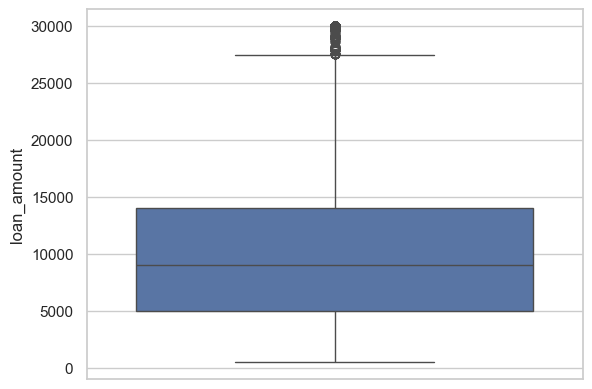

In [475]:
loan_amount_985 = loan_data_cleaned_df['loan_amount'].quantile(0.985)
loan_data_cleaned_df = loan_data_cleaned_df[loan_data_cleaned_df.loan_amount <= loan_amount_985]
sns.boxplot(loan_data_cleaned_df.loan_amount)

Though we dont see much change , we can live with it as Majority of Values for the loan amount are distributed continuos

#### Statistical Summary  
Let check the summary of data in the dataframe we will include both the numerical and category data type columns in rows.

In [476]:
loan_data_cleaned_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
loan_amount,36205.0,NaN,NaN,NaN,10138.444966,6290.365896,500.0,5000.0,9000.0,14000.0,30000.0
loan_period,36205.0,NaN,NaN,NaN,41.70087,10.213904,36.0,36.0,36.0,36.0,60.0
int_rate_percentage,36205.0,NaN,NaN,NaN,11.840919,3.637771,5.42,8.9,11.71,14.27,24.4
installment,36205.0,NaN,NaN,NaN,304.211137,187.342322,15.69,162.25,267.33,402.49,1106.07
grade,36205,7,B,11006,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub_grade,36205,35,A4,2731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,36205.0,NaN,NaN,NaN,5.022511,3.592407,0.0,2.0,4.0,9.0,10.0
home_ownership,36205,5,RENT,17912,NaN,NaN,NaN,NaN,NaN,NaN,NaN
annual_income,36205.0,NaN,NaN,NaN,60446.755988,27568.200792,4000.0,40000.0,55200.0,76460.0,140004.0
verification_status,36205,3,Not Verified,16276,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Couple of insights from summary  
The average interest rate on loan is 11.8% where minimum is 5.43% and maximum is 24.4%   
The average annual income of borrowers is 60k where minimum is 4k and maximum is 140k  
Most of the loan tenure isn of 36 months

In [477]:
loan_data_cleaned_df.head()

,loan_amount,loan_period,int_rate_percentage,installment,grade,sub_grade,tenure,home_ownership,annual_income,verification_status,issue_d,loan_status,purpose,state,total_account,total_payment
0,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,9,5863.16
1,2500,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,4,1008.71
2,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,10,3005.67
3,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,37,12231.89
5,5000,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,12,5632.21


#### Analysis  
1) Univariate analysis 
2) Bivariate analysis
3) Multivariate analysis

<Axes: xlabel='loan_status', ylabel='count'>

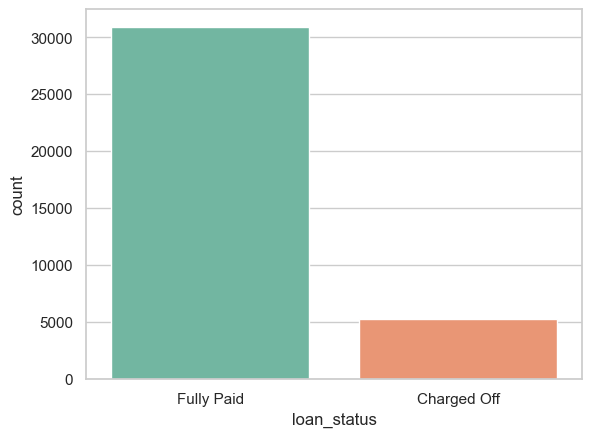

In [478]:
sns.countplot(x = 'loan_status', data = loan_data_cleaned_df,palette='Set2')

<Axes: xlabel='verification_status', ylabel='count'>

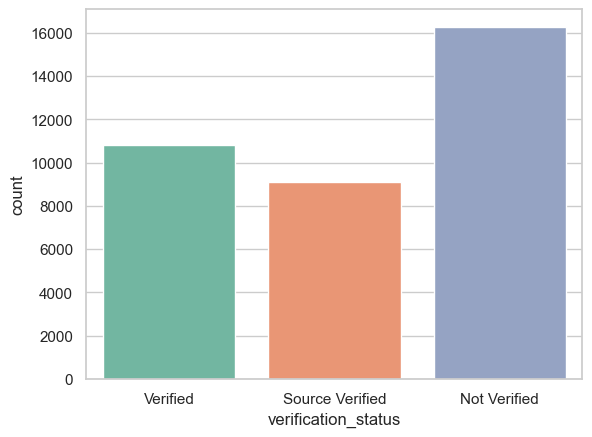

In [479]:
sns.countplot(x = 'verification_status', data = loan_data_cleaned_df,palette='Set2')

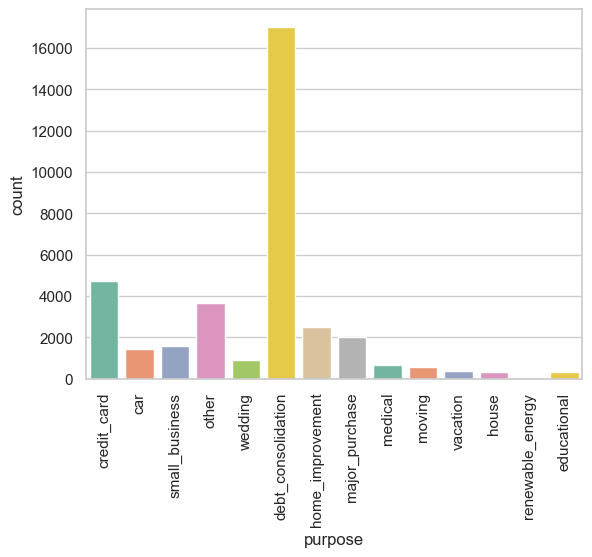

In [480]:
pltVar = sns.countplot(x='purpose', data=loan_data_cleaned_df,palette='Set2')

# Rotate x-axis labels by 90 degrees
pltVar.set_xticklabels(pltVar.get_xticklabels(), rotation=90);

<Axes: xlabel='grade', ylabel='count'>

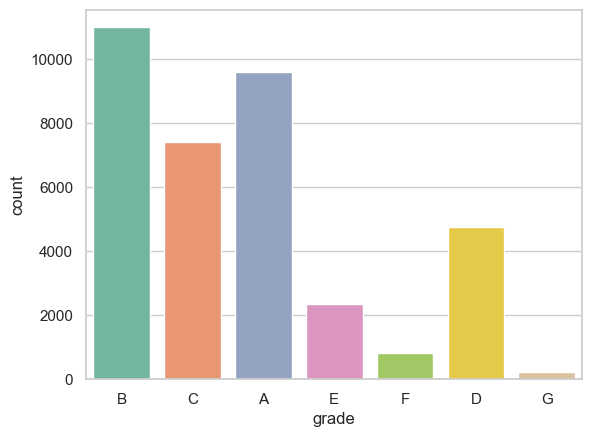

In [481]:
sns.countplot(x='grade', data=loan_data_cleaned_df,palette='Set2')

We can do additional anlysis wrt sub grades , however i am restricting myself to grades.

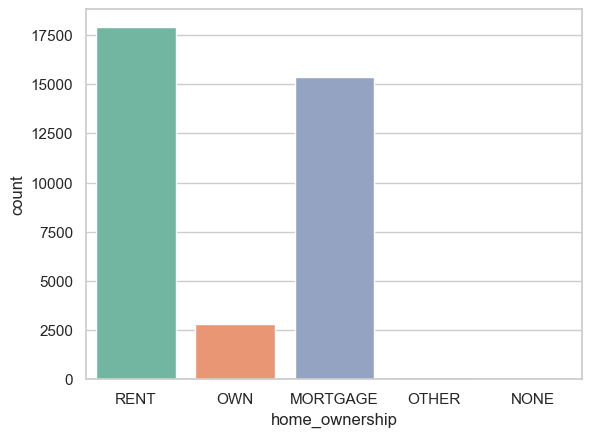

In [482]:
homeOwnership = sns.countplot(x='home_ownership', data=loan_data_cleaned_df,palette='Set2')

Here we see home ownership data wrt other , however its very insignificat as compared to other values like rent and mortgage.

#### Summary of Univariate analysis:
<b> Note:</b> loan is referred to the total dataset which contains all the rows containing  either Fully Paid or Charged Off loan status.  
#### 1) 14% of loans are charged off.  
#### 2) Near about 70% of loan were taken for debt consolidation  
#### 3) Near 40% of loan is not verified.
#### 4) Most of the loan belongs to A,B,C grade where C being the highest.
#### 5) Most of the loan borrowers have their home either on RENT or Mortgage.

#### Bivariate Analysis
#### Analyzing columsn wrt charged off to check the impact of column data.   
1) Purpose vs Charged Off
2) Home Ownership vs Charged Off
3) State vs Charged Off
4) Verification status vs Charged off
5) Grade vs Charged off
6) Tenure vs Charged off
7) Interest slab vs Charged off
8) Total account slab vs Charged off
9) Income slab vs Charged off
10) Loan tenure vs Charged off

#### Purpose vs Charged Off

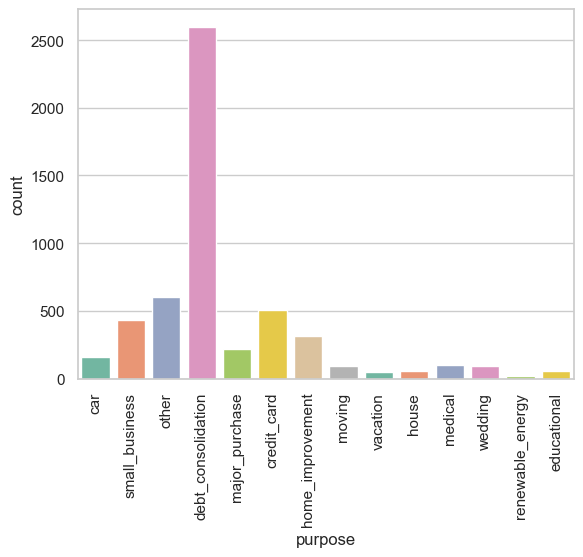

In [483]:
pltVar = sns.countplot(x='purpose', data=loan_data_cleaned_df[loan_data_cleaned_df['loan_status']=='Charged Off'],palette='Set2')
pltVar.set_xticklabels(pltVar.get_xticklabels(), rotation=90);

#### Home Ownership vs Charged Off

<Axes: xlabel='home_ownership', ylabel='count'>

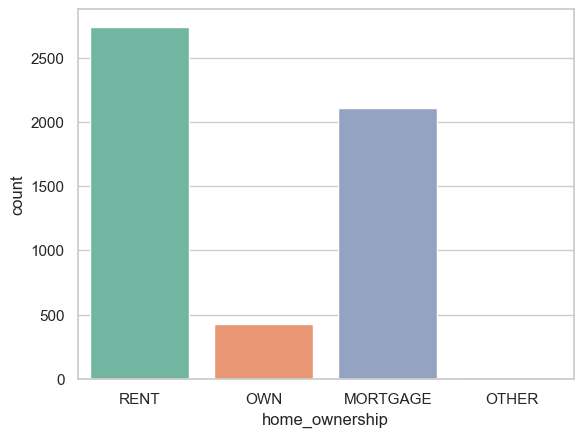

In [484]:
sns.countplot(x='home_ownership', data=loan_data_cleaned_df[loan_data_cleaned_df['loan_status']=='Charged Off'],palette='Set2')

#### State vs Charged Off

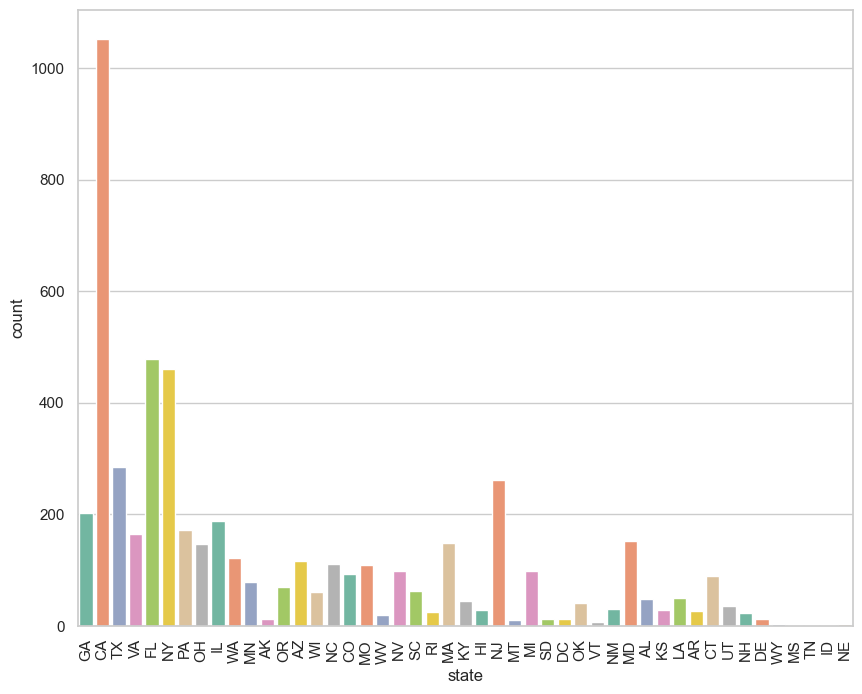

In [501]:
fig, ax = plt.subplots(figsize = (10,8))
st = sns.countplot(x='state', data=loan_data_cleaned_df[loan_data_cleaned_df['loan_status']=='Charged Off'],palette='Set2');
st.set_xticklabels(st.get_xticklabels(), rotation=90);

#### Verification status vs Charged off

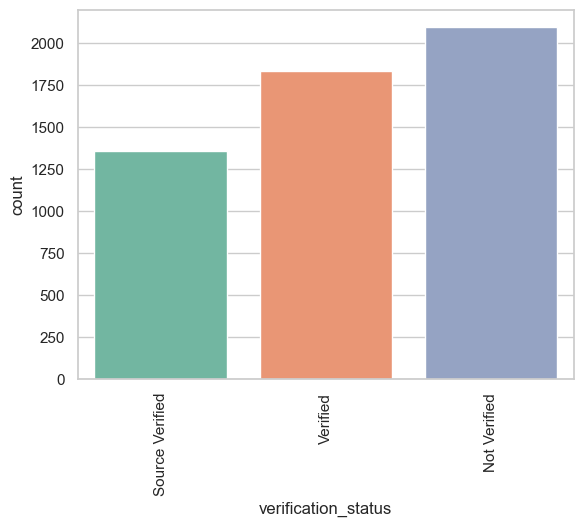

In [486]:
vs = sns.countplot(x='verification_status', data=loan_data_cleaned_df[loan_data_cleaned_df['loan_status']=='Charged Off'],palette='Set2');
vs.set_xticklabels(vs.get_xticklabels(), rotation=90);

#### Grade vs Charged off

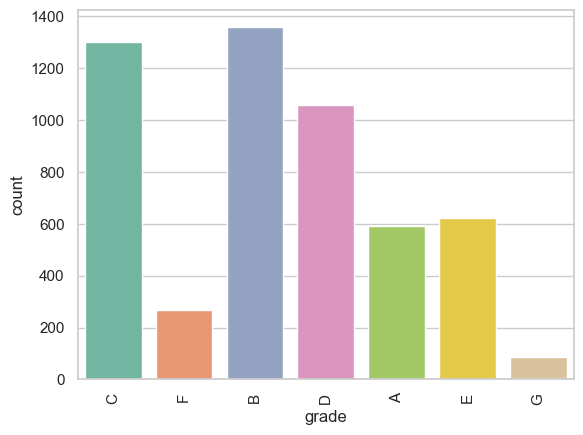

In [487]:
grd = sns.countplot(x='grade', data=loan_data_cleaned_df[loan_data_cleaned_df['loan_status']=='Charged Off'],palette='Set2');
grd.set_xticklabels(grd.get_xticklabels(), rotation=90);

#### Employee tenure vs Charged off

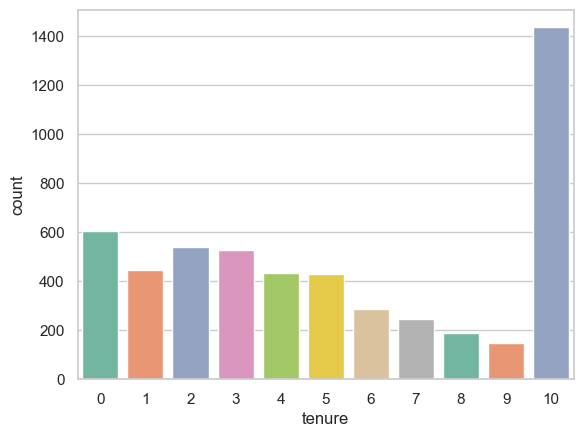

In [488]:
tenure = sns.countplot(x='tenure', data=loan_data_cleaned_df[loan_data_cleaned_df['loan_status']=='Charged Off'],palette='Set2');

#### Couple of bin/group creation from numerical columns   


In [489]:
# Interest rate, total accounts, annual income are grouped in slabs
loan_data_cleaned_df['int_rate_slab'] = pd.cut(loan_data_cleaned_df['int_rate_percentage'], bins=4,precision =0,labels=['5%-10%','10%-15%','15%-20%','20%-25%'])
loan_data_cleaned_df['total_account_slab'] = pd.cut(loan_data_cleaned_df['total_account'], bins=5,precision =0,labels=['1-20','20-40','40-60','60-80','80-100'])
loan_data_cleaned_df['annual_income_slab'] = pd.cut(loan_data_cleaned_df['annual_income'], bins=6,precision =0,labels =['2k-25k','25k-50k','50k-75k','75k-100k','100k-125k','125k-150k'])

In [490]:
loan_data_cleaned_df.head()

,loan_amount,loan_period,int_rate_percentage,installment,grade,sub_grade,tenure,home_ownership,annual_income,verification_status,issue_d,loan_status,purpose,state,total_account,total_payment,int_rate_slab,total_account_slab,annual_income_slab
0,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,9,5863.16,10%-15%,1-20,2k-25k
1,2500,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,4,1008.71,15%-20%,1-20,25k-50k
2,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,10,3005.67,15%-20%,1-20,2k-25k
3,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,37,12231.89,10%-15%,20-40,25k-50k
5,5000,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,12,5632.21,5%-10%,1-20,25k-50k


#### Interest slab vs Charged off

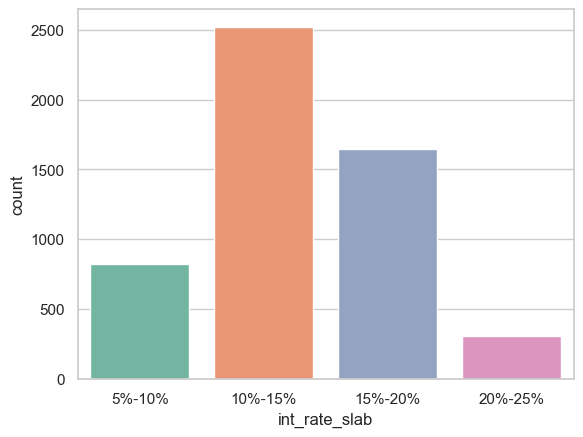

In [491]:
sns.countplot(x='int_rate_slab', data=loan_data_cleaned_df[loan_data_cleaned_df['loan_status']=='Charged Off'],palette='Set2');

#### Total account slab vs Charged off

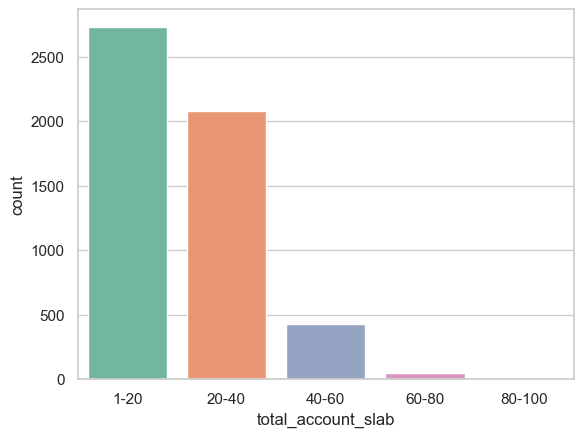

In [492]:
sns.countplot(x='total_account_slab', data=loan_data_cleaned_df[loan_data_cleaned_df['loan_status']=='Charged Off'],palette='Set2');

#### Income slab vs Charged off

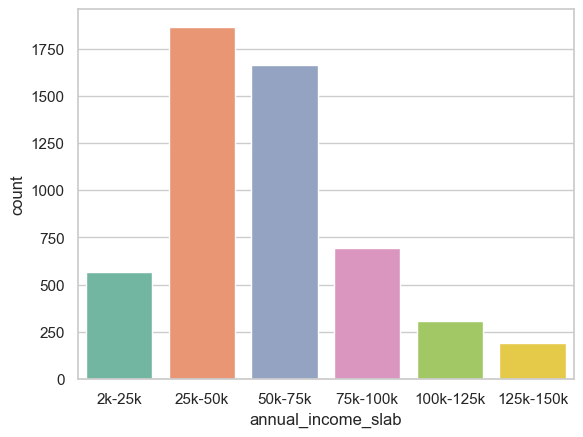

In [493]:
sns.countplot(x='annual_income_slab', data=loan_data_cleaned_df[loan_data_cleaned_df['loan_status']=='Charged Off'],palette='Set2');

#### Loan tenure vs Charged Off

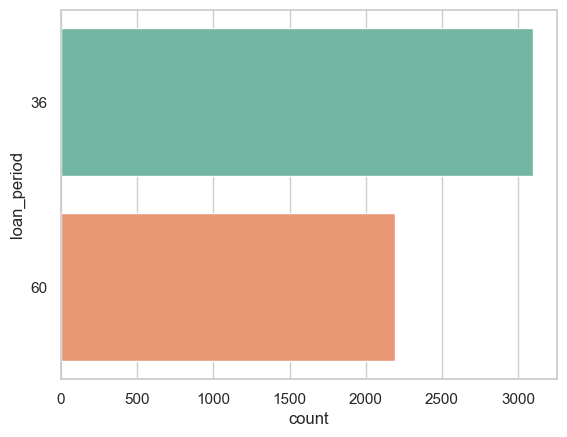

In [494]:
sns.countplot(y='loan_period', data=loan_data_cleaned_df[loan_data_cleaned_df['loan_status']=='Charged Off'],palette='Set2');

In [495]:
# Splittig the issue date into month and year
df_mnt_yr = loan_data_cleaned_df['issue_d'].str.partition("-", True)  
loan_data_cleaned_df['issue_month']=df_mnt_yr[0]                       
loan_data_cleaned_df['issue_year']='20' + df_mnt_yr[2]
loan_data_cleaned_df.head()

,loan_amount,loan_period,int_rate_percentage,installment,grade,sub_grade,tenure,home_ownership,annual_income,verification_status,issue_d,loan_status,purpose,state,total_account,total_payment,int_rate_slab,total_account_slab,annual_income_slab,issue_month,issue_year
0,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,9,5863.16,10%-15%,1-20,2k-25k,Dec,2011
1,2500,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,4,1008.71,15%-20%,1-20,25k-50k,Dec,2011
2,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,10,3005.67,15%-20%,1-20,2k-25k,Dec,2011
3,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,37,12231.89,10%-15%,20-40,25k-50k,Dec,2011
5,5000,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,12,5632.21,5%-10%,1-20,25k-50k,Dec,2011


<Axes: xlabel='issue_month', ylabel='count'>

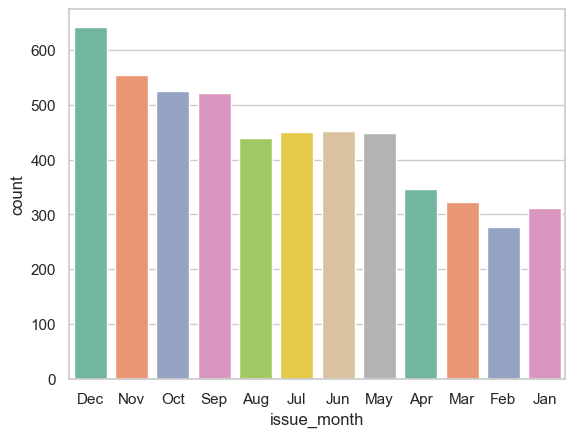

In [496]:
sns.countplot(x='issue_month', data=loan_data_cleaned_df[loan_data_cleaned_df['loan_status']=='Charged Off'],palette='Set2')

<Axes: xlabel='issue_year', ylabel='count'>

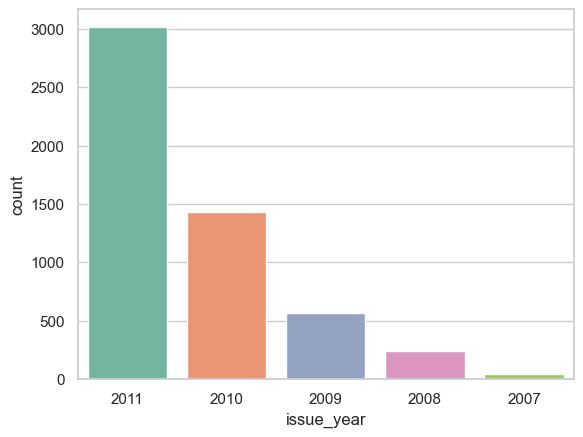

In [497]:
sns.countplot(x='issue_year', data=loan_data_cleaned_df[loan_data_cleaned_df['loan_status']=='Charged Off'],palette='Set2')

#### Maximum defaulters belongs to loans where the issue year is 2011 and issue months moslty falls under the later half of the year where it peaks is December.

### Summary of Bivariate Analysis:

**Note:** Loan refers to the total dataset, which contains all the rows containing either Fully Paid or Charged Off loan status.

#### Following are the insights from each variable with respect to loan charged-off status:

- Borrowers have taken loans to clean their existing debt.
- Borrowers have home ownership as rent.
- Borrowers belong to California state.
- Borrowers were given loans without verification.
- Borrowers have been loan-graded as B.
- Borrowers' tenure in the company is 10 years or more.
- Borrowers who receive interest at the rate of 10-15%.
- Borrowers who have total accounts in the range of 1 - 20.
- Borrowers whose income falls in the range of 25k to 50k.
- Borrowers taking a loan for a tenure of 36 months.
- Maximum borrowers who defaulted belong to loans where the issue year is 2011, and issue months mostly fall under the latter half of the year, peaking in December.
 December.ortgage


#### Multivariate Analysis
#### Correlation Matrix

In [498]:
numeric_columns  = ['loan_amount','loan_period','int_rate_percentage','installment','tenure','annual_income','total_account','total_payment']

In [499]:
cor_matrix = loan_data_cleaned_df[numeric_columns].corr()

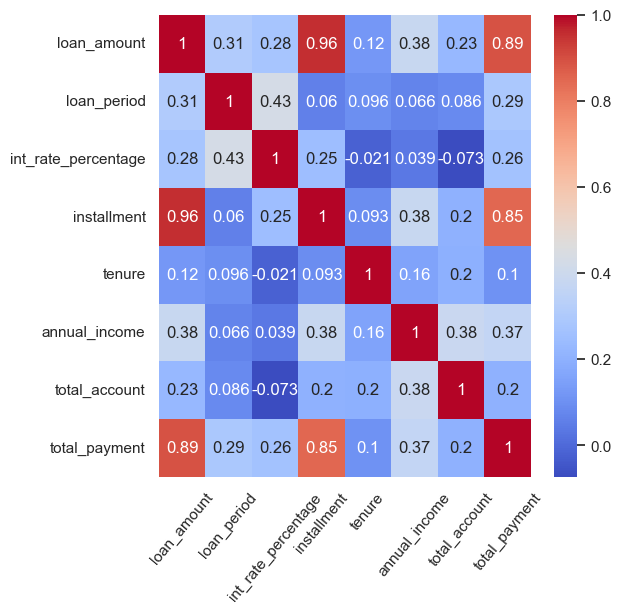

In [503]:
f,axis = plt.subplots(figsize= (6,6))

sns.heatmap(cor_matrix,xticklabels = cor_matrix.columns.values,yticklabels= cor_matrix.columns.values,
           cmap= 'coolwarm', annot = True)
plt.xticks(rotation=50)
plt.show()